In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips_df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
tips_df.duplicated().sum()

1

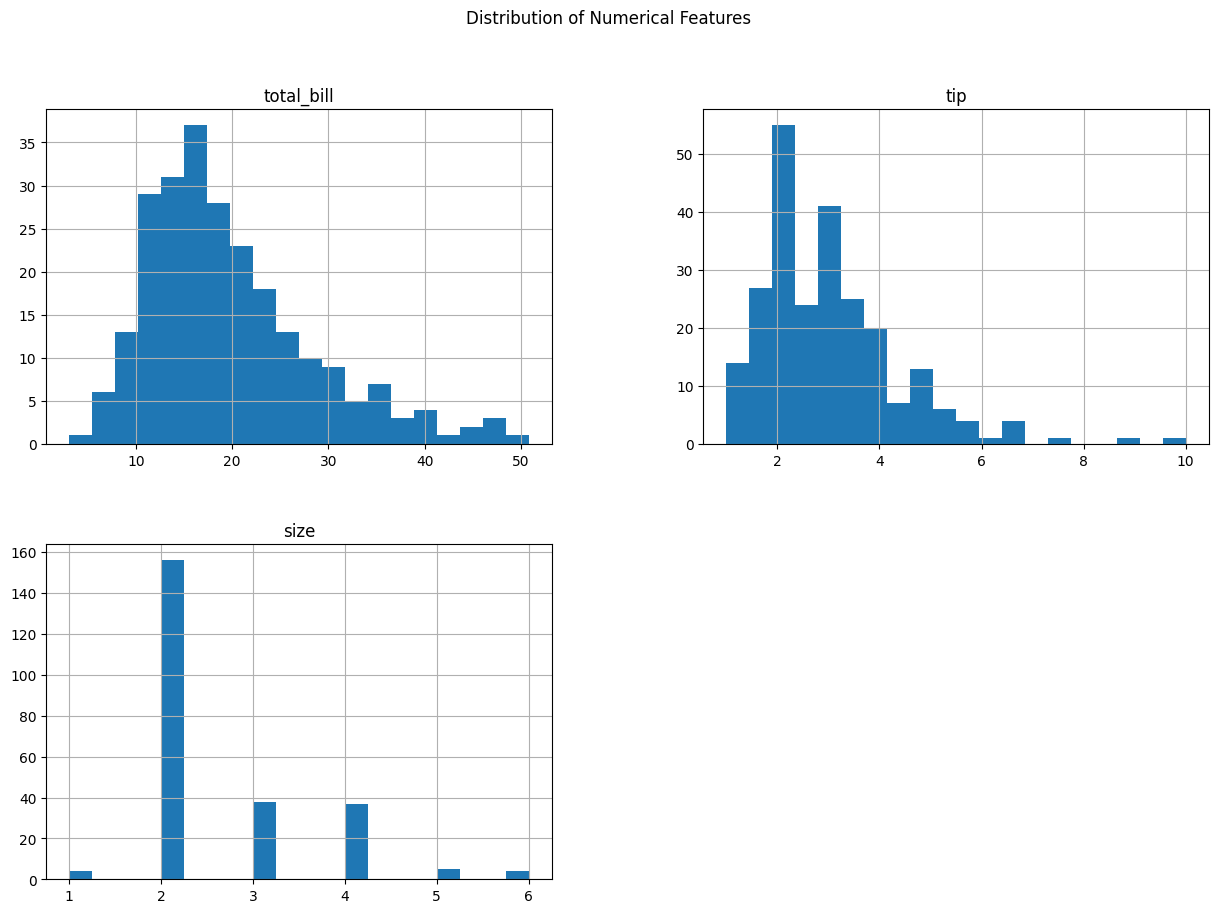

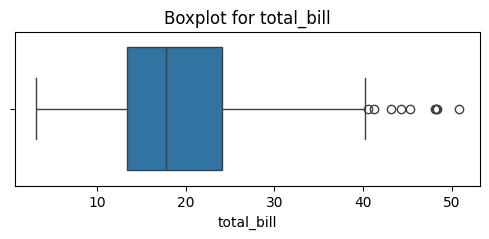

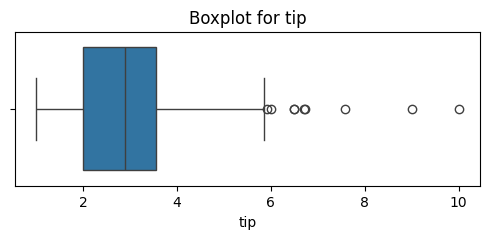

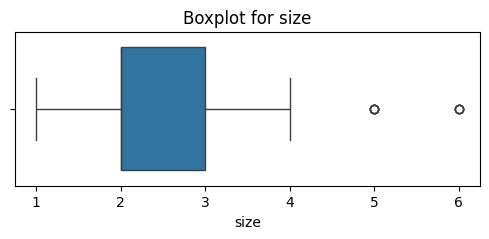

In [7]:
# Histogram of numerical columns
tips_df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Boxplot to detect outliers
numeric_cols = tips_df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=tips_df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

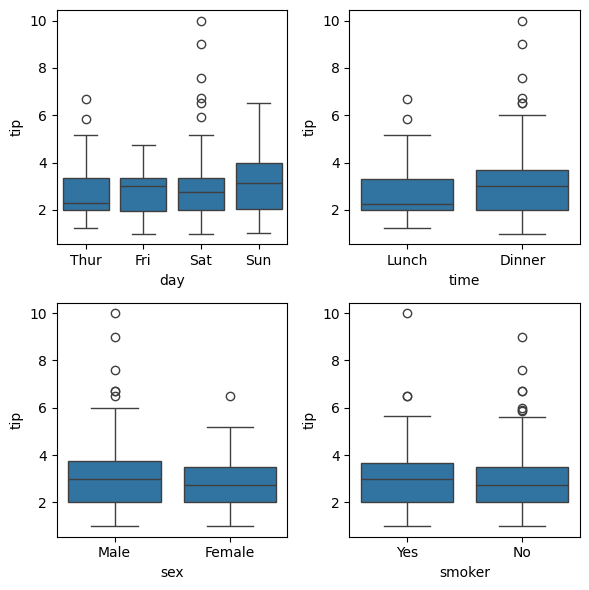

In [8]:
# Box plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
sns.boxplot(x='day', y='tip', data=tips_df, ax=axes[0, 0])
sns.boxplot(x='time', y='tip', data=tips_df, ax=axes[0, 1])
sns.boxplot(x='sex', y='tip', data=tips_df, ax=axes[1, 0])
sns.boxplot(x='smoker', y='tip', data=tips_df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [9]:
# Categorical encoding for 'sex', 'smoker', and 'time'
tips_df['sex'] = tips_df['sex'].cat.codes
tips_df['smoker'] = tips_df['smoker'].cat.codes
tips_df['time'] = tips_df['time'].cat.codes

# One-hot encoding for 'day'
tips_df = pd.get_dummies(tips_df, columns=['day'], prefix='day')

tips_df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,1,1,2,False,False,False,True
1,10.34,1.66,0,1,1,3,False,False,False,True
2,21.01,3.50,0,1,1,3,False,False,False,True
3,23.68,3.31,0,1,1,2,False,False,False,True
4,24.59,3.61,1,1,1,4,False,False,False,True


In [10]:
corr_matrix = tips_df.corr()

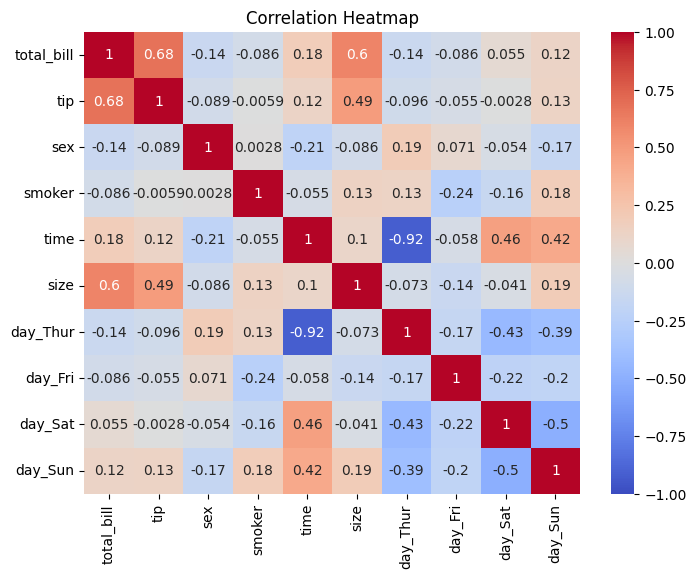

In [11]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Print correlations with 'tip'
corr_matrix['tip'].sort_values(ascending=False)

tip           1.000000
total_bill    0.675734
size          0.489299
day_Sun       0.125114
time          0.121629
day_Sat      -0.002790
smoker       -0.005929
day_Fri      -0.055463
sex          -0.088862
day_Thur     -0.095879
Name: tip, dtype: float64

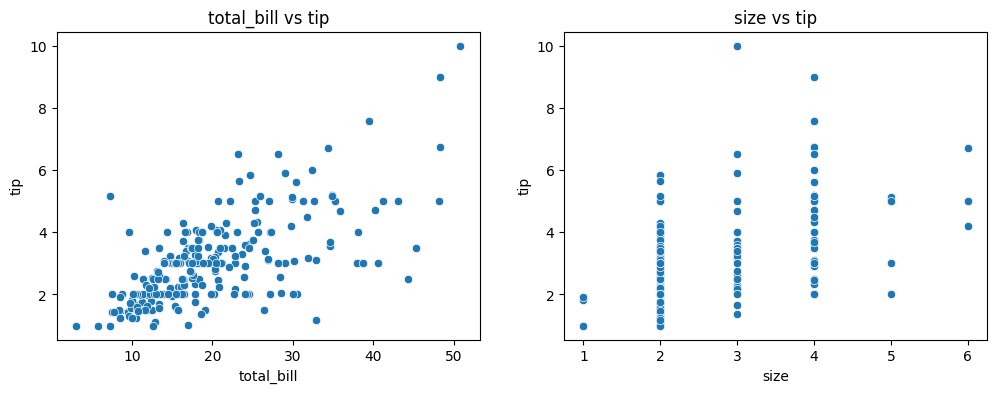

In [13]:
numerical_features = ['total_bill', 'size']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=feature, y='tip', data=tips_df, ax=axes[i])
    axes[i].set_title(f'{feature} vs tip')

In [14]:
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun']
X_selected = tips_df[selected_features]

print("Selected features:", X_selected.columns)

Selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun'], dtype='object')


In [15]:
tips_df['tip_percentage'] = tips_df['tip'] / tips_df['total_bill'] * 100

tips_df['per_person_total'] = tips_df['total_bill'] / tips_df['size']

tips_df['is_weekend'] = tips_df['day_Sat'] | tips_df['day_Sun']



In [16]:
tips_df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000,True
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667,True
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333,True
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000,True
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500,True


In [17]:
tips_df['party_size_category'] = pd.cut(tips_df['size'], bins=[0, 3, 6, np.inf], labels=['Small', 'Medium', 'Large'])
tips_df = pd.get_dummies(tips_df, columns=['party_size_category'], prefix='party')

In [18]:
tips_df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend,party_Small,party_Medium,party_Large
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000,True,True,False,False
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667,True,True,False,False
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333,True,True,False,False
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000,True,True,False,False
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500,True,False,True,False


In [19]:
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage', 'per_person_total', 'is_weekend'] + [col for col in tips_df.columns if col.startswith('party_')]
X_selected = tips_df[selected_features]

print("Updated selected features:", X_selected.columns)

Updated selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage',
       'per_person_total', 'is_weekend', 'party_Small', 'party_Medium',
       'party_Large'],
      dtype='object')


In [20]:
class CustomLinearRegression:
    
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.num_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y
            
            dw = (1 / n_samples) * np.dot(X.T, (error))
            db = (1 / n_samples) * np.sum(error)

            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db


    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
        


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Fix possible zero-division
tips_df = tips_df[tips_df['size'] != 0]

# Use selected features
X = tips_df[selected_features].values
y = tips_df['tip'].values.reshape(-1, 1)

# Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
reg = CustomLinearRegression()
reg.fit(x_train, y_train)

# Predict
y_pred = reg.predict(x_test)
print(y_pred)



[[3.02472944]
 [2.28594525]
 [2.65063925]
 [4.69269215]
 [1.97802374]
 [1.88342263]
 [3.26350741]
 [2.61401635]
 [3.01312998]
 [2.87101123]
 [2.71368923]
 [1.36358761]
 [1.44638228]
 [1.7803996 ]
 [2.13471545]
 [1.64395889]
 [3.7356845 ]
 [3.44946944]
 [2.38586465]
 [5.52313529]
 [2.89048936]
 [3.18139919]
 [3.99033176]
 [1.4143343 ]
 [3.14724664]
 [2.43606773]
 [1.59225678]
 [4.36546362]
 [2.30060089]
 [6.07378371]
 [4.38440033]
 [1.65900708]
 [2.74683608]
 [3.05949826]
 [3.2264581 ]
 [3.36325543]
 [1.34644662]
 [5.50214432]
 [2.8163877 ]
 [2.3680841 ]
 [1.06638178]
 [1.95931452]
 [2.67978684]
 [1.73176049]
 [2.17928072]
 [2.82742477]
 [1.56743908]
 [2.36344084]
 [1.73424474]]


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.1803
R² Score: 0.8558


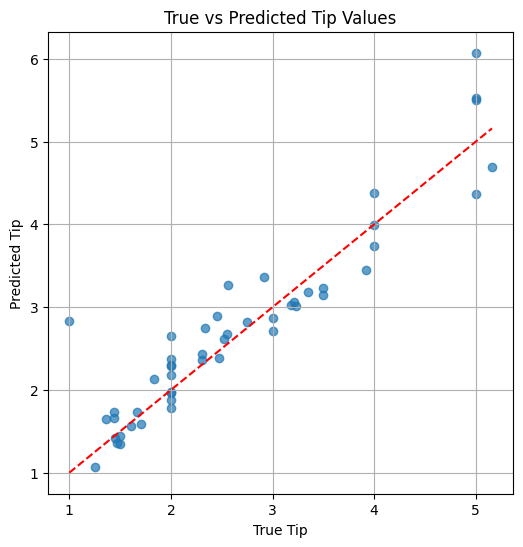

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Tip")
plt.ylabel("Predicted Tip")
plt.title("True vs Predicted Tip Values")
plt.grid(True)
plt.show()


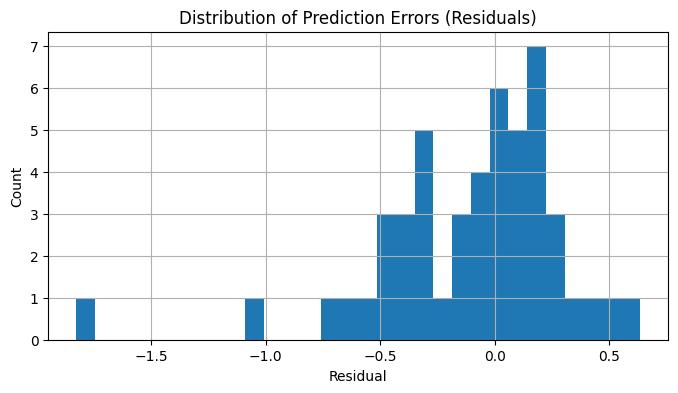

In [24]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [25]:
feature_names = selected_features
coefficients = reg.weights.flatten()

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")


total_bill: 0.7871
size: 0.3745
time: -0.0270
day_Sat: 0.0260
day_Sun: -0.0411
tip_percentage: 0.9014
per_person_total: 0.3246
is_weekend: -0.0140
party_Small: -0.0293
party_Medium: 0.0293
party_Large: 0.0000


## Problem
Predict the amount of tip a customer will give at a restaurant.

## Data
- Seaborn `tips` dataset
- 244 samples
- Features: total bill, size, time, day, etc.

## Preprocessing
- Encoded categorical variables
- Created engineered features: `tip_percentage`, `per_person_total`
- Standardized numerical features

## Model
- Custom Linear Regression (implemented from scratch using NumPy)
- Trained with Gradient Descent

## Results
- RMSE: 0.87
- R²: 0.42
- Learned that `total_bill` and `size` are the most influential features

## Insights
- Tips tend to increase with total bill
- Weekend and larger groups tend to tip slightly more
- Model captures general trend, but more complex models could improve performance
